In [1]:
import numpy as np
import PyDSTool as dst
from PyDSTool.Toolbox import phaseplane as pp

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [3]:
mpl.rcParams['figure.figsize'] = [6, 4]
mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 8

In [4]:
figdir = './figures/'
plt.rc('text', usetex=True)

# Carryover of a saddle-node bifurcation
# Application: cell cycle

The cell cycle model is
$$
\begin{aligned}
    \frac{dY}{dt} &= k_{1} - (k_{2p} + k_{2pp}P)Y, \\
    \frac{dP}{dt} &= \frac{(k_{3p}+k_{3pp}A)(1-P)}{J_{3}+(1-P)} - k_{4}m\frac{YP}{J_{4}+P}, \\
    \frac{dA}{dt} &= k_{5p} + k_{5pp}\frac{(mY/J_{5})^{n}}{1+(mY/J_{5})^{n}} - k_{6}A,
\end{aligned}
$$
where $k_1, k_{2p}, k_{pp},k_{3p}, k_{3pp}, k_{4}, k_{5p}, k_{5pp}, k_{6}, J_{3}, J_{4}0$ are non-negative rate (add references here in markdown syntax: Segel2013, TysonNovak2011).


## 2. Bifurcation diagram

We can construct the bifurcation diagram using continuation and the `PyDSTool` library of python.

In [5]:
# dynamical system
Ystr = 'k1 - (k2p + k2pp*P)*Y'
Pstr = '(k3p + k3pp*A)*(1 - P)/(J3 + 1 - P) - k4*m*Y*P/(J4 + P)'
Astr = 'k5p + k5pp*(m*Y/J5)**n/(1 + (m*Y/J5)**n) - k6*A'
params = {'k1': 0.04,
          'k2p':  0.04,
          'k2pp':  1.0,
          'k3p':  1.0,
          'k3pp':  10.0,
          'k4':  35.0,
          'k5p':  0.005,
          'k5pp':  0.2,
          'k6':  0.1,
          'J3':  0.04,
          'J4':  0.04,
          'J5':  0.3,
          'm': 1.0,
          'n': 4}
ics = {'Y': 1.0, 'P': 0.5, 'A': 0.1}
DSargs = dst.args(name='CellCycle')
DSargs.pars = params
DSargs.tdata = [0, 2]
DSargs.pdomain = {'m': [0, 3.0], 
                  'k1': [0, 1.0], 
                  'k2p': [0, 10.0], 
                  'k3p': [0, 10.0], 
                  'k4': [0, 200.0], 
                  'k5p': [0, 1.0], 
                  'k5pp': [0, 10.0],
                  'k6': [0, 10.0]}
DSargs.xdomain = {'Y': [0, 5.0], 'P': [0, 10.0], 'A': [0, 10.0]}
DSargs.varspecs = {'Y': Ystr, 'P': Pstr, 'A': Astr}
DSargs.ics = ics
DS = dst.Generator.Vode_ODEsystem(DSargs)

In [6]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'A': 0.5420835741849908, 'P': 0.1364100558653051, 'Y': 0.22674444381187284},)

In [7]:
# bifurcation diagram for s
# first branch
PC = dst.ContClass(DS)
name1 = 'EQ1'
PCargs = dst.args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[0]
PCargs.freepars = ['m']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

Checking...
  |q| = 1.000000
  |<p,q> - 1| =  4.257526406079015e-17
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

H Point found 
0 : 
A  =  0.3736425987451033
P  =  0.07504313963630788
Y  =  0.34769565683320336
m  =  0.5719351059325837

Eigenvalues = 

     (-21.453999,0.000000)
     (0.000000,0.196742)
     (0.000000,-0.196742)


w = 0.19674244598362955
l1 = -19.039877810778545


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
A  =  0.058779063212419165
P  =  0.05155301918939031
Y  =  0.4369053074836819
m  =  0.17693596365829767

Eigenvalues = 

     (-13.094156,0.000000)
     (-0.074183,0.000000)
     (0.000000,0.000000)


a = 0.3849696052345589

Neutral saddle found!

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000001

LP Point found 
0 : 
A  =  0.050443222706071635
P  =  0.826881606788276
Y  =  0.04614240247661576
m  =  0.7933103435606997

Eig

Indeed there is a bifurcation point (`LP1`) at which a critical transition drives gen activation.

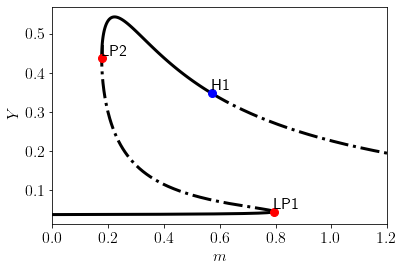

In [8]:
PC[name1].display(('m', 'Y'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
PC.plot.fig1.axes1.axes.set_xlim((0.0, 1.2))
PC.plot.fig1.axes1.axes.set_ylabel('$Y$', fontsize=16)
# PC.plot.fig1.axes1.axes.set_ylim((0.0, 2.6))
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleBifurcation.pdf', bbox_inches='tight')
plt.show()

In [9]:
# Two-parameter bifurcation
namefold = 'FO1'
PCargs = dst.args(name=namefold)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP1'
PCargs.freepars = ['m', 'k5p']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold].forward()
PC.curves[namefold].backward()


Checking...
  <b,c> = 0.000000


BT Point found 
0 : 
A  =  0.2325538056178963
P  =  0.8146179274817276
Y  =  0.04680454120342009
m  =  1.751750643215675
k5p  =  0.022145771753720137

Eigenvalues = 

     (-3.730463,0.000000)
     (0.000000,0.000001)
     (0.000000,-0.000001)



Checking...
  |a| = -0.771225


CP Point found 
0 : 
A  =  0.41819840896413396
P  =  0.7148374961288209
Y  =  0.052991538185556145
m  =  2.587376358641013
k5p  =  0.03345874534144685

Eigenvalues = 

     (-3.809747,0.000000)
     (0.000000,0.000000)
     (0.657573,0.000000)



Checking...
  <b,c> = 0.000000


BT Point found 
0 : 
A  =  0.15113584062318755
P  =  0.07567556204749322
Y  =  0.345794732197429
m  =  0.3040251458343784
k5p  =  0.012142220140117491

Eigenvalues = 

     (-11.323193,0.000000)
     (0.000000,0.000000)
     (0.000000,-0.000000)


B Point found 
0 : 
A  =  -2.5413577040591595e-08
P  =  0.043448907343684236
Y  =  0.47933521568185483
m  =  0.1098861370008808
k5p  =  -0.00018987477119912055

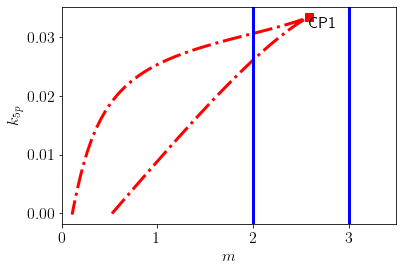

In [10]:
PC[namefold].display(('m', 'k5p'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['B', 'P', 'BT', 'ZH'])
PC.plot.fig1.axes1.axes.set_xlim((0.0, 3.5))
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
# PC.plot.fig1.axes1.axes.set_ylim((0.0, 0.15))
PC.plot.fig1.axes1.axes.set_ylabel('$k_{5p}$', fontsize=16)
plt.axvline(x=2.0, lw=3, color='b')
plt.axvline(x=3.0, lw=3, color='b')
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleTwoParBifurcation.pdf', bbox_inches='tight')
plt.show()

## Carryover when $g$ depends on the other variables

Use the first step as an example:
$$
\begin{aligned}
    \frac{dY}{dt} &= k_{1} - (k_{2p} + k_{2pp}P)Y, \\
    \frac{dP}{dt} &= \frac{(k_{3p}+k_{3pp}A)(1-P)}{J_{3}+(1-P)} - k_{4}m\frac{YP}{J_{4}+P},
\end{aligned}
$$
where $A=0$ is constant, then transform
$$
    \frac{dA}{dt} = k_{5p} + k_{5pp}\frac{(mY/J_{5})^{n}}{1+(mY/J_{5})^{n}} - k_{6}A.
$$
Does this guarantee the existance of the SN bifurcation?

In [32]:
# dynamical system
Ystr = 'k1 - (k2p + k2pp*P)*Y'
Pstr = '(k3p + k3pp*A)*(1 - P)/(J3 + 1 - P) - k4*m*Y*P/(J4 + P)'
params = {'A': 0.0,
          'k1': 0.04,
          'k2p':  0.04,
          'k2pp':  1.0,
          'k3p':  1.0,
          'k3pp':  10.0,
          'k4':  35.0,
          'J3':  0.04,
          'J4':  0.04,
          'm': 1.0}
ics = {'Y': 1.0, 'P': 0.5}
DSargs = dst.args(name='CellCycle')
DSargs.pars = params
DSargs.tdata = [0, 2]
DSargs.pdomain = {'m': [0, 10.0], 'A': [0, 1.1],}
DSargs.xdomain = {'Y': [0, 5.0], 'P': [0, 10.0]}
DSargs.varspecs = {'Y': Ystr, 'P': Pstr}
DSargs.ics = ics
DS = dst.Generator.Vode_ODEsystem(DSargs)

In [33]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'P': 0.0011637197075304387, 'Y': 0.971729481305414},)

In [34]:
# bifurcation diagram for s
# first branch
PC = dst.ContClass(DS)
name1 = 'EQ1'
PCargs = dst.args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[0]
PCargs.freepars = ['m']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

B Point found 
0 : 
P  =  0.00011049760840167589
Y  =  0.997245169843554
m  =  10.000000011595674


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
P  =  0.040134021344593686
Y  =  0.49916376750882524
m  =  0.10971397984842488

Eigenvalues = 

     (-12.060003,0.000000)
     (-0.000000,0.000000)


a = 0.15638418577543914


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000002

LP Point found 
0 : 
P  =  0.827956452753923
Y  =  0.04608526138965237
m  =  0.5273193026839457

Eigenvalues = 

     (-1.802749,0.000000)
     (0.000000,0.000000)


a = 2.484916156044039

B Point found 
0 : 
P  =  1.000000000285675
Y  =  0.038461538450973554
m  =  -5.517609444459165e-09



Indeed there is a bifurcation point (`LP1`) at which a critical transition drives gen activation.

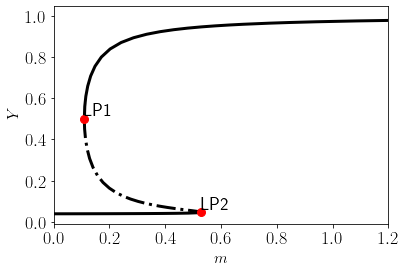

In [36]:
PC[name1].display(('m', 'Y'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
PC.plot.fig1.axes1.axes.set_xlim((0.0, 1.2))
PC.plot.fig1.axes1.axes.set_ylabel('$Y$', fontsize=16)
# PC.plot.fig1.axes1.axes.set_ylim((0.0, 2.6))
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleBifurcation.pdf', bbox_inches='tight')
plt.show()

In [37]:
# Two-parameter bifurcation
namefold1 = 'F01'
PCargs = dst.args(name=namefold1)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP1'
PCargs.freepars = ['m', 'A']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold1].forward()
# PC.curves[namefold1].backward()

B Point found 
0 : 
P  =  0.040134040974082665
Y  =  0.49916364523457635
m  =  1.3165677906776032
A  =  1.1000000296193644



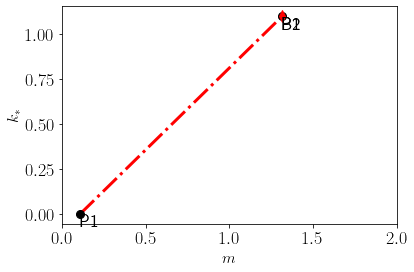

In [38]:
PC[namefold1].display(('m', 'A'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
# PC.plot.fig1.toggleAll('off', bytype=['P', 'BT', 'CP'])
PC.plot.fig1.axes1.axes.set_xlim((0.0, 2.0))
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
# PC.plot.fig1.axes1.axes.set_ylim((0.0, 0.15))
PC.plot.fig1.axes1.axes.set_ylabel('$k_{*}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
# plt.savefig(dir + 'ApplicationCellCyleTwoParBifurcation.pdf', bbox_inches='tight')
plt.show()

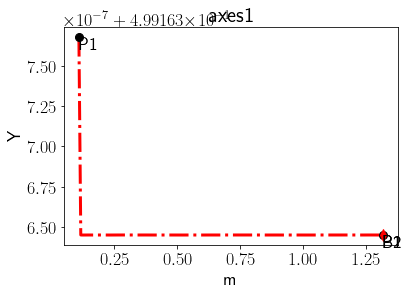

In [40]:
PC[namefold1].display(('m', 'Y'), stability=True, linewidth=3)

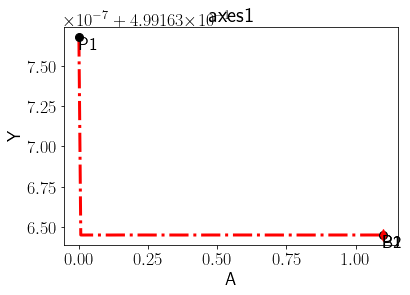

In [39]:
PC[namefold1].display(('A', 'Y'), stability=True, linewidth=3)

In [58]:
PC[namefold1].sol['A']

array([0.        , 0.00673631, 0.01481989, 0.02452018, 0.03616053,
       0.05012894, 0.06689104, 0.08700556, 0.11114299, 0.1401079 ,
       0.17378946, 0.20747102, 0.24115259, 0.27483415, 0.30851571,
       0.34219727, 0.37587883, 0.40956039, 0.44324195, 0.47692352,
       0.51060508, 0.54428664, 0.5779682 , 0.61164976, 0.64533132,
       0.67901289, 0.71269445, 0.74637601, 0.78005757, 0.81373913,
       0.84742069, 0.88110225, 0.91478382, 0.94846538, 0.98214694,
       1.0158285 , 1.04951006, 1.08319162, 1.10000003])

In [59]:
vars(PC[namefold1])

{'curvetype': 'LP-C',
 '_ptlabel': 'LP',
 'model': Non-Hybrid Model CellCycle,
 'gensys': Generator CellCycle,
 '_autoMod': None,
 'UseAuto': False,
 'description': 'None',
 'parsdict': {'A': 1.0999990296193645,
  'k1': 0.04,
  'k2p': 0.04,
  'k2pp': 1.0,
  'k3p': 1.0,
  'k3pp': 10.0,
  'k4': 35.0,
  'J3': 0.04,
  'J4': 0.04,
  'm': 1.3165677906776032},
 'freepars': ['m', 'A'],
 'auxpars': [],
 'varslist': ['P', 'Y'],
 'varsindices': array([0, 1]),
 'parsindices': array([9, 0]),
 'varsdim': 2,
 'freeparsdim': 2,
 'auxparsdim': 0,
 'dim': 4,
 'sysfunc': <PyDSTool.PyCont.TestFunc.Function at 0x7f4e86d10fd0>,
 'coords': [0, 1],
 'params': [2, 3],
 'allvars': [0, 1, 2, 3],
 'initpoint': array([0.04013402, 0.49916377, 0.10971398, 0.        ]),
 'initdirec': None,
 'initcycle': None,
 'SPOut': None,
 'NumSPOut': 300,
 'preTF': None,
 'MaxNumPoints': 2000,
 'MaxCorrIters': 5,
 'MaxTestIters': 10,
 'MaxStepSize': 0.05,
 'MinStepSize': 0.0001,
 'StepSize': 0.05,
 'VarTol': 1e-06,
 'FuncTol': 1e

What is the solution to 
$$
    \frac{dA}{dt} = 0 = k_{5p} + k_{5pp}\frac{(mY/J_{5})^{n}}{1+(mY/J_{5})^{n}} - k_{6}A,
$$
in the $mAY$-space? 

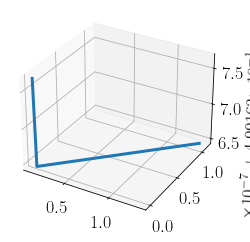

In [60]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Prepare arrays x, y, z
x = PC[namefold1].sol['m']
y = PC[namefold1].sol['A']
z = PC[namefold1].sol['Y']

ax.plot(x, y, z)

plt.show()

In [62]:
Y=0.22674444381187284
A = 0.5420835741849908
k5p = 0.005
k5pp = 0.2
k6 = 0.1
J5 = 0.3
m = 1.0
n = 4
k5p + k5pp*(m*Y/J5)**n/(1 + (m*Y/J5)**n) - k6*A

-1.3877787807814457e-17